In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
ds = pd.read_csv("StudentsPerformance.csv")

In [4]:
ds.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33


# Genderwise participant counts

In [5]:
ds['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

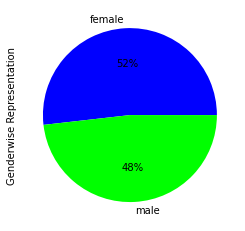

In [6]:
ds['gender'].value_counts().plot.pie(label=('Genderwise Representation'),colormap='brg', autopct='%1.0f%%') 
plt.show()

Thus we have 518 female participants and 482 male participants.

# Analysis of students' parental level of education

In [7]:
ds['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

Text(0, 0.5, 'Count')

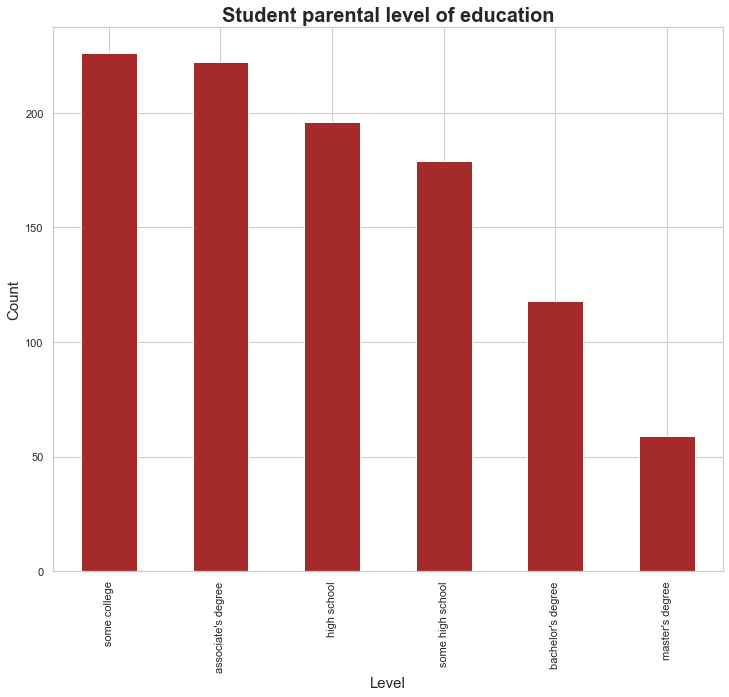

In [43]:
plt.figure(figsize=(12,10))
ds['parental level of education'].value_counts().plot(kind='bar', color= 'brown')
plt.title('Student parental level of education',fontsize=20,fontweight='bold')
plt.xlabel('Level',fontsize=15)
plt.ylabel('Count',fontsize=15)

From the graph it is clear that majority of the parents has gone to some college and most of them possess an associate degree. Only few of them have masters degree.

# Who scores the most on average for math, reading and writing based on
● Gender
● Test preparation course

In [9]:
math_max_mark= ds.groupby(['race/ethnicity','gender','test preparation course'],as_index=True).agg({'math score':'max'})
reading_max_mark= ds.groupby(['race/ethnicity','gender','test preparation course'],as_index=True).agg({'reading score':'max'})
writing_max_mark= ds.groupby(['race/ethnicity','gender','test preparation course'],as_index=True).agg({'writing score':'max'})
print(math_max_mark)
print(reading_max_mark)
print(writing_max_mark)

                                               math score
race/ethnicity gender test preparation course            
group A        female completed                        92
                      none                             82
               male   completed                       100
                      none                             91
group B        female completed                        94
                      none                             97
               male   completed                        94
                      none                             90
group C        female completed                        96
                      none                             91
               male   completed                        98
                      none                             97
group D        female completed                        97
                      none                             98
               male   completed                       100
              

# Scoring variation for math, reading and writing based on
● Gender
● Test preparation course

In [25]:
Average_scores = ds.groupby(['gender','test preparation course']).median()
Average_scores

math score  reading score  writing score
gender test preparation course                                          
female completed                        67             78             79
       none                             62             71             70
male   completed                        74             72             71
       none                             67             63             60

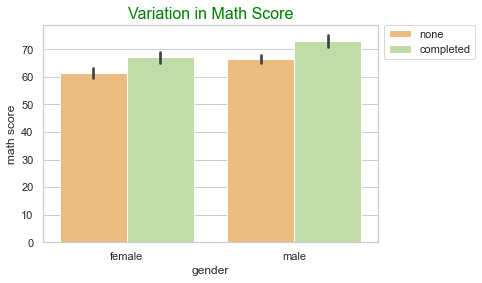

In [52]:

sns.set_theme(style="whitegrid")
sns.barplot(y='math score',x='gender',hue='test preparation course',palette = 'Spectral',data=ds);
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);
plt.title('Variation in Math Score',fontsize=16,color = 'green');

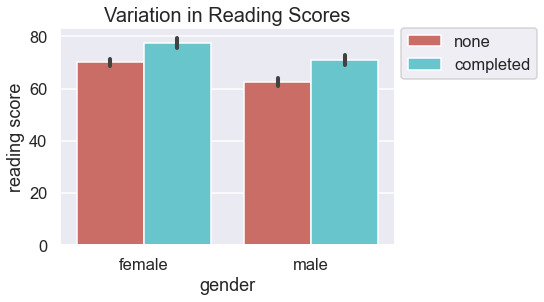

In [53]:
sns.set_context('talk')
sns.set_style('darkgrid')
sns.barplot(y='reading score',x='gender',hue='test preparation course',palette = 'hls',data=ds);
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);
plt.title('Variation in Reading Scores',fontsize=20);

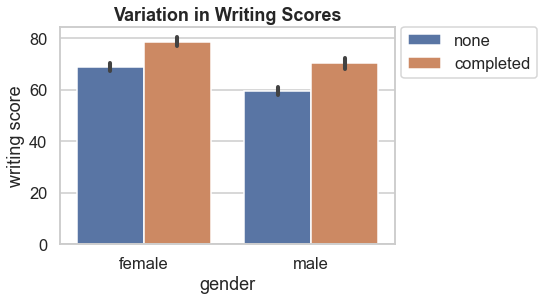

In [56]:
sns.set_context('talk')
sns.set_style('whitegrid')
sns.barplot(y='writing score',x='gender',hue='test preparation course',data=ds);
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);
plt.title('Variation in Writing Scores',fontsize=18, fontweight = 'bold');

# Criteria for Bonus Points

It is given that top 25% of students are eligible for Bonus Points based on their Maths scores. 
We have 1000 students in total. 
25 % of 1000 = 250
Thus 250 students are eligible for Bonus points.
When we sort the dataset based on descending order of math score, 

In [13]:
ds.sort_values('math score', ascending=False)[:250]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
999,male,group E,bachelor's degree,standard,completed,100,100,100
996,male,group A,some college,standard,completed,100,96,86
515,female,group E,some college,standard,none,100,92,97
517,female,group E,associate's degree,standard,none,100,100,100
516,female,group E,bachelor's degree,standard,none,100,100,100
...,...,...,...,...,...,...,...,...
856,male,group E,some high school,standard,completed,77,76,77
855,male,group E,associate's degree,free/reduced,completed,77,69,68
854,male,group D,some high school,standard,completed,77,68,69
853,male,group D,associate's degree,free/reduced,none,77,78,73


Thus we can infer that the students who scored 77 or above in Maths are eligible to get bonus points.